# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yusuf Rahmadhani Asy'Ari
- **Email:** ggdani137@gmail.com
- **ID Dicoding:** rmdhannni

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa faktor-faktor yang mempengaruhi jumlah penyewaan sepeda dalam periode waktu tertentu?
- Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan waktu dan kondisi cuaca?

## Import Library dan Data


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Fungsi untuk memuat data
def load_data():
    hour_df = pd.read_csv('data/hour.csv')
    day_df = pd.read_csv('data/day.csv')
    return hour_df, day_df

# Load data
hour_df, day_df = load_data()


## Data Wrangling

### Gathering Data

In [10]:
# Menambahkan kolom 'dteday' sebagai tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])



### Assessing Data

**Insight:**
- Data memiliki kolom-kolom yang diperlukan untuk analisis.
- Statistik deskriptif menunjukkan rentang nilai dan distribusi data.


In [11]:
# Menampilkan informasi awal dan statistik deskriptif
hour_df.info()
day_df.info()

hour_df.describe()
day_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Cleaning Data

**Insight:**
- Data yang hilang telah dihapus untuk memastikan analisis yang akurat.


In [12]:
# Menghapus data yang tidak lengkap atau tidak relevan
hour_df.dropna(inplace=True)
day_df.dropna(inplace=True)


## Exploratory Data Analysis (EDA)

### Explore RFM Analysis

**Insight:**
a. Faktor yang Mempengaruhi Jumlah Penyewaan Sepeda


C:\Users\YUSUF RAHMADHANI\AppData\Local\Temp\ipykernel_7092\1482242656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rentals_per_hour, x='hr', y='cnt', palette='coolwarm')


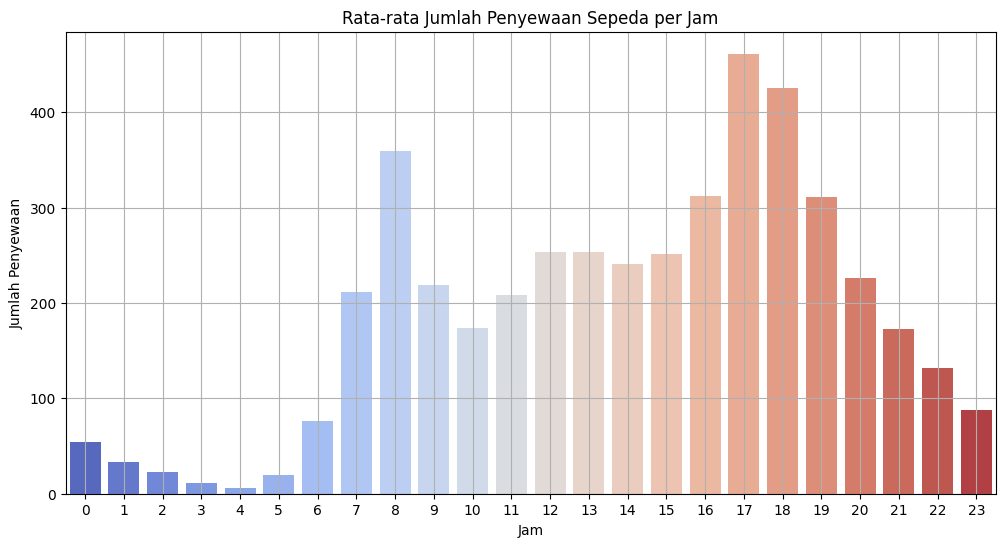

In [13]:
# Menghitung rata-rata jumlah penyewaan berdasarkan jam
avg_rentals_per_hour = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi rata-rata penyewaan berdasarkan jam
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_rentals_per_hour, x='hr', y='cnt', palette='coolwarm')
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()


b. Pola Penyewaan Sepeda Berdasarkan Waktu dan Kondisi Cuaca

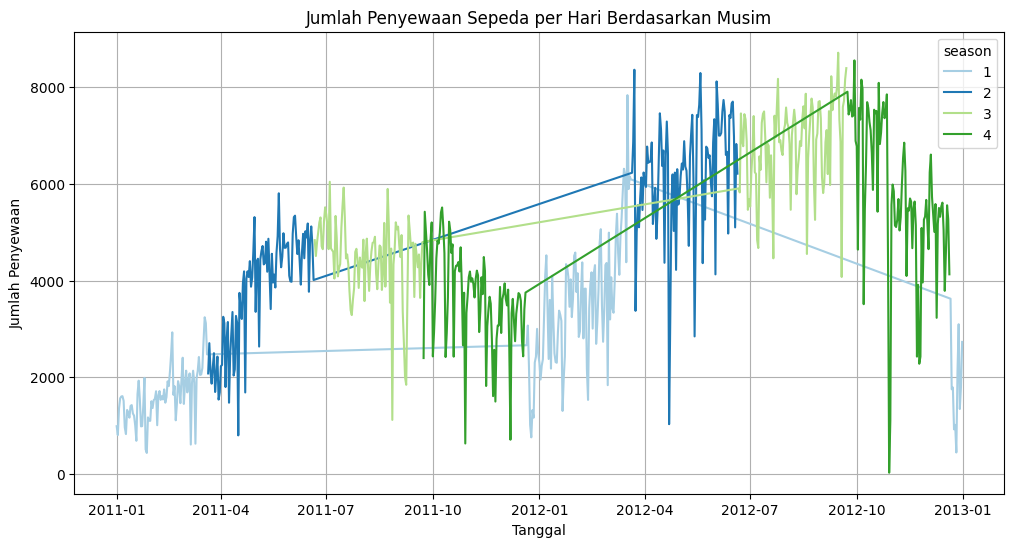

C:\Users\YUSUF RAHMADHANI\AppData\Local\Temp\ipykernel_7092\818176247.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hour_df, x='weathersit', y='cnt', palette='Set2')


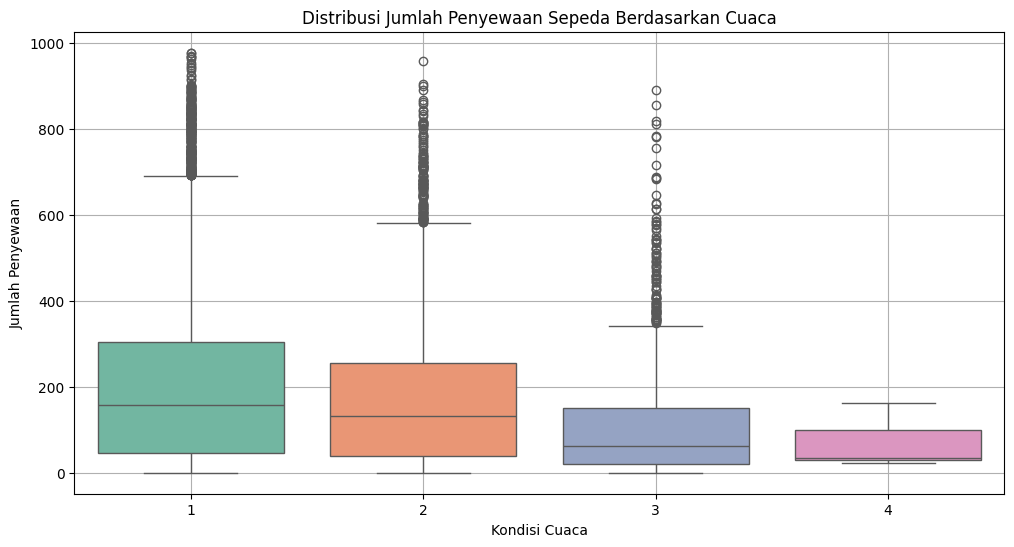

In [14]:
# Visualisasi jumlah penyewaan berdasarkan waktu dan kondisi cuaca
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='season', palette='Paired')
plt.title('Jumlah Penyewaan Sepeda per Hari Berdasarkan Musim')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

# Visualisasi distribusi penyewaan berdasarkan cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(data=hour_df, x='weathersit', y='cnt', palette='Set2')
plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()


## Visualization & Explanatory Analysis

Pertanyaan 1: Apa faktor-faktor yang mempengaruhi jumlah penyewaan sepeda dalam periode waktu tertentu?

i. Visualisasi Rata-rata Penyewaan Sepeda per Jam

C:\Users\YUSUF RAHMADHANI\AppData\Local\Temp\ipykernel_7092\1482242656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rentals_per_hour, x='hr', y='cnt', palette='coolwarm')


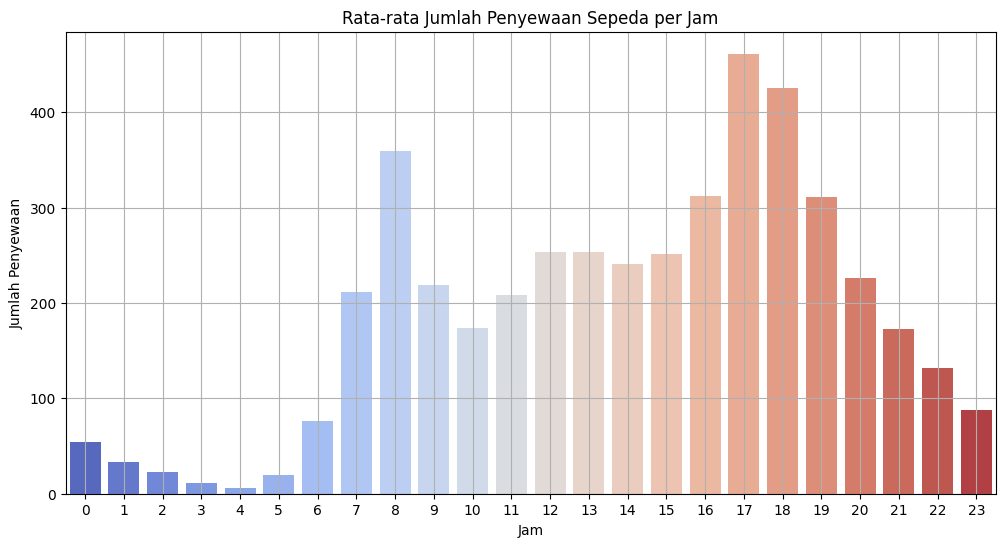

In [15]:
# Menghitung rata-rata jumlah penyewaan berdasarkan jam
avg_rentals_per_hour = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi rata-rata penyewaan berdasarkan jam
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_rentals_per_hour, x='hr', y='cnt', palette='coolwarm')
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()


Penjelasan

Grafik bar ini menunjukkan rata-rata jumlah penyewaan sepeda untuk setiap jam dalam sehari. Ini membantu kita memahami waktu-waktu puncak dan waktu-waktu dengan penyewaan yang lebih rendah.


ii. Visualisasi Penyewaan Sepeda Berdasarkan Cuaca

C:\Users\YUSUF RAHMADHANI\AppData\Local\Temp\ipykernel_7092\180827842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hour_df, x='weathersit', y='cnt', palette='Set2')


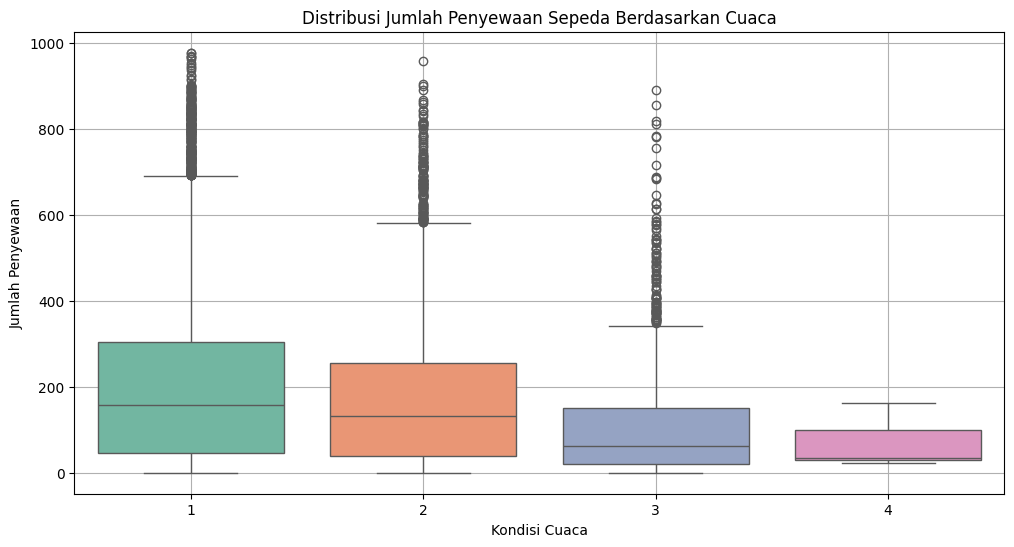

In [16]:
# Visualisasi distribusi penyewaan berdasarkan cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(data=hour_df, x='weathersit', y='cnt', palette='Set2')
plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()


Penjelasan:

Boxplot ini menggambarkan distribusi jumlah penyewaan sepeda untuk berbagai kondisi cuaca. Ini membantu dalam mengidentifikasi bagaimana cuaca mempengaruhi jumlah penyewaan.

b. Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan waktu dan kondisi cuaca?

i. Visualisasi Jumlah Penyewaan Sepeda per Hari Berdasarkan Musim

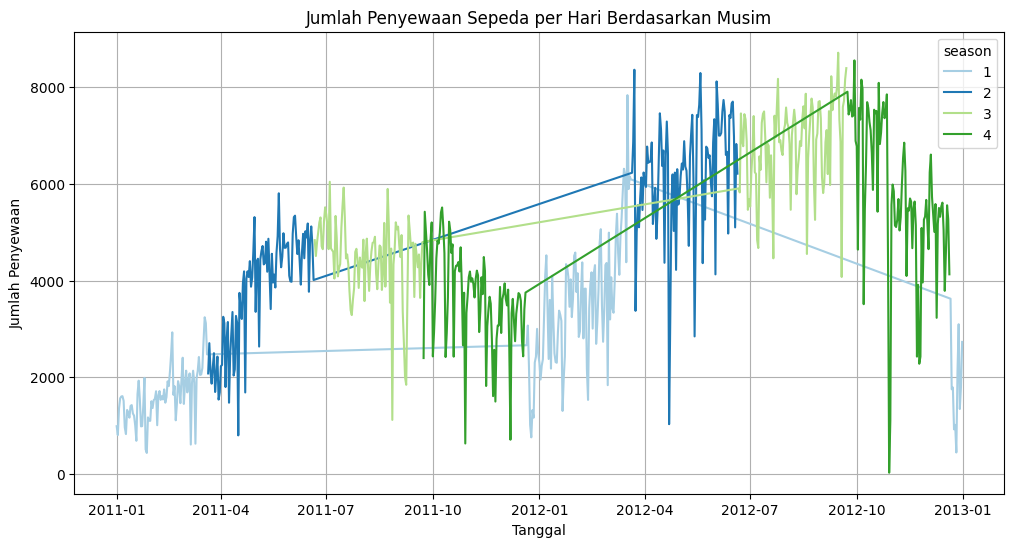

In [17]:
# Visualisasi jumlah penyewaan berdasarkan waktu dan kondisi cuaca
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='season', palette='Paired')
plt.title('Jumlah Penyewaan Sepeda per Hari Berdasarkan Musim')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()


    Penjelasan:

Grafik lineplot ini menunjukkan tren jumlah penyewaan sepeda setiap hari sepanjang waktu, dengan pemisahan berdasarkan musim. Ini memberikan wawasan tentang pola musiman dalam penyewaan sepeda.

ii. Visualisasi Penyewaan Sepeda per Bulan

C:\Users\YUSUF RAHMADHANI\AppData\Local\Temp\ipykernel_7092\1576435305.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_rentals, x='month', y='cnt', palette='viridis')


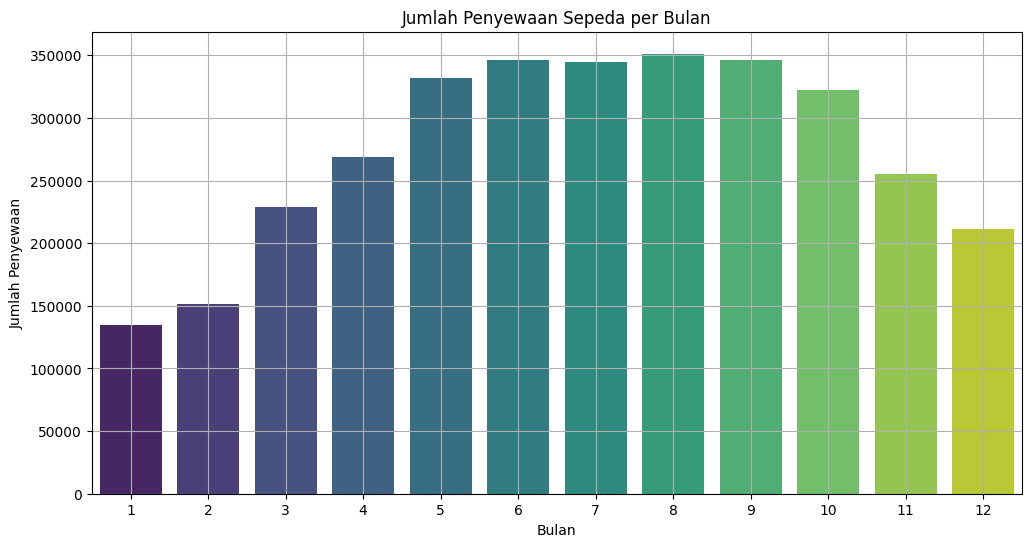

In [18]:
# Menambahkan kolom bulan untuk analisis
day_df['month'] = day_df['dteday'].dt.month
monthly_rentals = day_df.groupby('month')['cnt'].sum().reset_index()

# Visualisasi jumlah penyewaan per bulan
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_rentals, x='month', y='cnt', palette='viridis')
plt.title('Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()


Penjelasan:

Grafik bar ini menggambarkan total jumlah penyewaan sepeda per bulan. Ini membantu untuk melihat tren bulanan dan efek musiman dalam penyewaan sepeda.

## Conclusion

- **Pertanyaan 1:** Visualisasi menunjukkan bahwa jumlah penyewaan sepeda bervariasi sepanjang hari, dengan waktu-waktu puncak dan rendah yang jelas. Kondisi cuaca juga mempengaruhi jumlah penyewaan, dengan variasi yang signifikan berdasarkan jenis cuaca.
  
- **Pertanyaan 2:** Pola penyewaan sepeda menunjukkan variasi berdasarkan musim dan waktu dalam setahun. Jumlah penyewaan cenderung meningkat pada bulan-bulan tertentu dan berbeda-beda tergantung pada musim.
